# Exploration of GABA Receptors

In [1]:
import NotebookImport
from metaPCNA import *

importing IPython notebook from metaPCNA

importing IPython notebook from Imports

importing IPython notebook from Global_Parameters

GABRD is the top hit for tumor-associated, proliferation independent genes.

In [2]:
f_win.order().tail()

LOC283914    0.41
CST2         0.42
C16orf13     0.43
GABRD        0.47
SEMA5B       0.48
Name: fraction overexpressed\n(detrended), dtype: float64

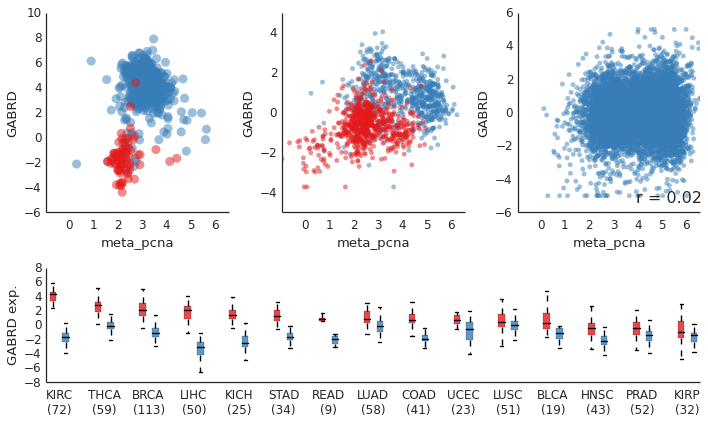

In [3]:
switch_plot('GABRD')

GABRD is one of many GABA receptor subunits. Many of which are down-regulated.

In [4]:
gabr = [g for g in rna_df.index if g.startswith('GABR')]
f = dx_rna.ix[gabr].dropna()
f.join(f_win).sort(f_win.name)

,num_ox,num_dx,frac,p,fraction overexpressed (detrended)
GABRA2,141,654,0.22,1.59e-50,-0.31
GABRA4,145,645,0.22,1.39e-46,-0.27
GABRB1,201,629,0.32,8.11e-20,-0.16
GABRP,248,684,0.36,6.25e-13,-0.15
GABRB3,218,684,0.32,1.29e-21,-0.12
GABRG1,189,635,0.30,6.76e-25,-0.12
GABRG3,273,632,0.43,7.10e-04,-0.12
GABRA3,333,602,0.55,1.02e-02,-0.10
GABRA5,281,617,0.46,2.96e-02,-0.09
GABRB2,245,678,0.36,4.92e-13,-0.06


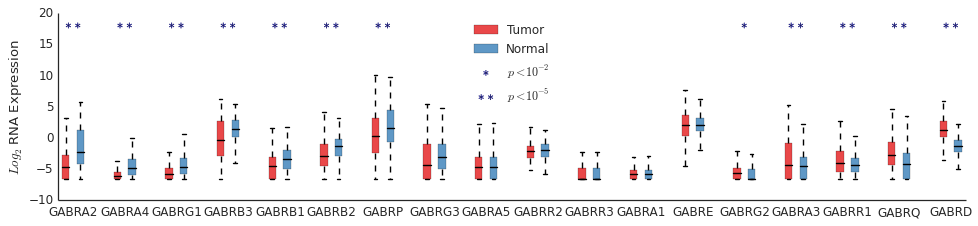

In [5]:
paired_boxplot_tumor_normal(matched_rna.ix[gabr].clip(-9,10).T, 
                            order=list(f.frac.order().index))
prettify_ax(plt.gca())

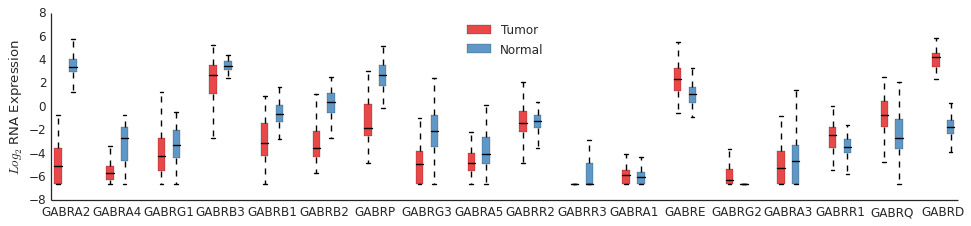

In [6]:
paired_boxplot_tumor_normal(matched_rna.ix[gabr, ti(codes.str.startswith('KIRC'))].clip(-9,10).T, 
                            order=list(f.frac.order().index), sig=False)
prettify_ax(plt.gca())

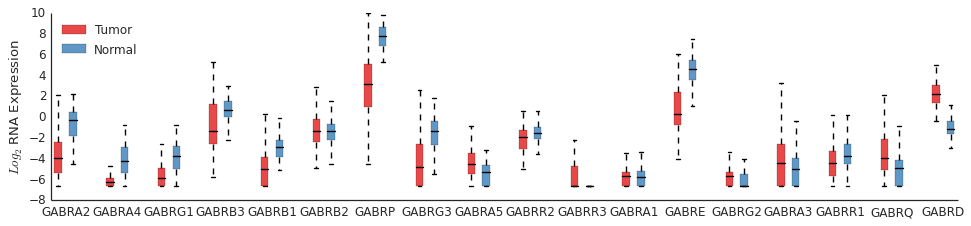

In [7]:
paired_boxplot_tumor_normal(matched_rna.ix[gabr, ti(codes.str.startswith('BRCA'))].clip(-9,10).T, 
                            order=list(f.frac.order().index), sig=False)
prettify_ax(plt.gca())

GABRA2 and GABRA4 seem to be downregulated most of the time. 

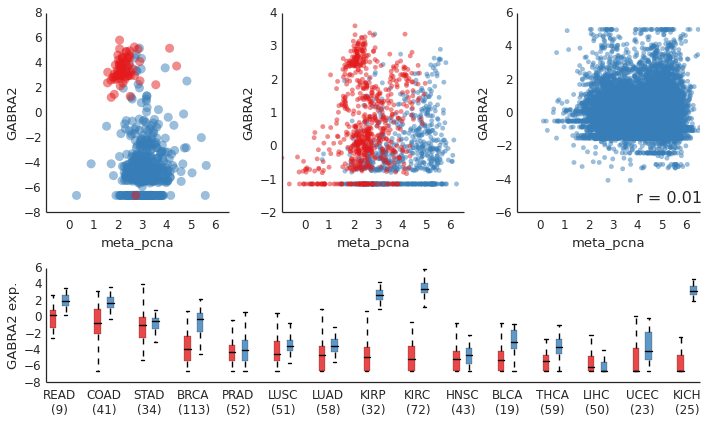

In [8]:
switch_plot('GABRA2')

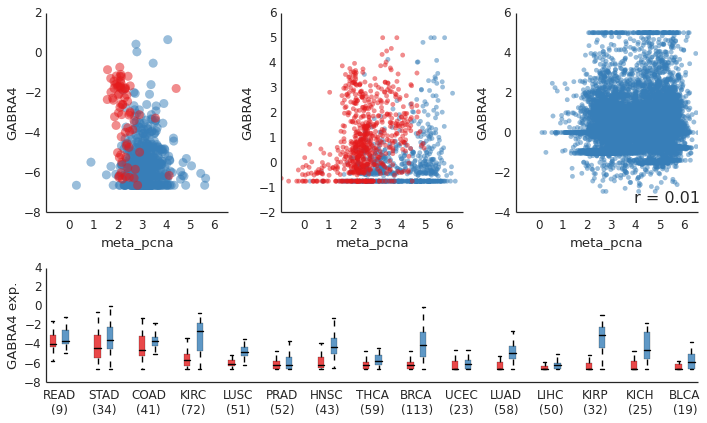

In [9]:
switch_plot('GABRA4')

Looking for gene sets concordinant with GABRD differential expression.

In [10]:
rr = df_s.corrwith(df_s.ix['GABRD'], 1).dropna()
enr = screen_feature(rr.order(), rev_kruskal, gene_sets.T, align=False)
enr.head(4)

,H,p,q
NABA_CORE_MATRISOME,193.14,6.55e-44,8.71e-41
REACTOME_IMMUNE_SYSTEM,157.31,4.37e-36,2.91e-33
KEGG_OLFACTORY_TRANSDUCTION,143.35,4.93e-33,2.03e-30
REACTOME_OLFACTORY_SIGNALING_PATHWAY,142.92,6.11e-33,2.03e-30


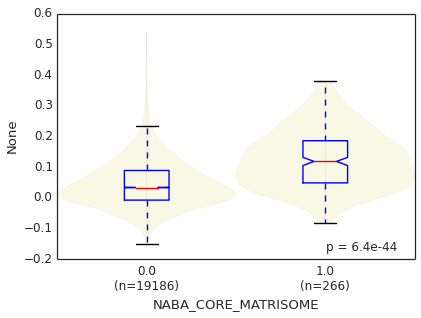

In [11]:
violin_plot_pandas(gene_sets['NABA_CORE_MATRISOME'], rr.replace(1, np.nan))

I'm storing intermediate results here because they can take a bit to compute. If anything gets changed, you are going to want to restore the results by setting the __RERUN__ flag.

In [12]:
RERUN = False
try:
    assert RERUN == False
    corr_profile_t = pd.read_hdf(RNA_SUBREAD_STORE, 'dfs_correlations')
    corr_profile_m = pd.read_hdf(RNA_SUBREAD_STORE, 'dx_correlations')
    corr_change = corr_profile_m - corr_profile_t
except:
    corr_profile_t = df_s.T.corr()
    corr_profile_t.to_hdf(RNA_SUBREAD_STORE, 'dfs_correlations')

    corr_profile_m = dx.T.corr()
    corr_profile_m.to_hdf(RNA_SUBREAD_STORE, 'dx_correlations')

In [13]:
rr = screen_feature(corr_change.ix['GABRD'], rev_kruskal, gene_sets.T, align=False)
rr.head()

,H,p,q
REACTOME_IMMUNE_SYSTEM,219.04,1.47e-49,1.95e-46
KEGG_CYTOKINE_CYTOKINE_RECEPTOR_INTERACTION,123.39,1.14e-28,7.61e-26
REACTOME_IMMUNOREGULATORY_INTERACTIONS_BETWEEN_A_LYMPHOID_AND_A_NON_LYMPHOID_CELL,106.16,6.79e-25,3.01e-22
REACTOME_ADAPTIVE_IMMUNE_SYSTEM,104.58,1.51e-24,5.01e-22
KEGG_HEMATOPOIETIC_CELL_LINEAGE,97.18,6.35e-23,1.69e-20


In [14]:
%%prun
tstats = {}
for gs in rr[rr.q < 10e-10].index:
    mm = corr_change.groupby(gene_sets[gs]).mean()
    vv = corr_change.groupby(gene_sets[gs]).var()
    tt = ((mm.ix[1] - mm.ix[0]) / 
          np.sqrt(vv.div(gene_sets[gs].value_counts(), axis=0)).sum())
    tt = tt.dropna().order()
    tstats[gs] = tt
tstats = pd.DataFrame(tstats)

In [15]:
tstats.rank(ascending=False).ix['GABRD'].order().head(10)

BIOCARTA_NKT_PATHWAY                                                                   3
KEGG_HEMATOPOIETIC_CELL_LINEAGE                                                       10
KEGG_ALLOGRAFT_REJECTION                                                              28
KEGG_VIRAL_MYOCARDITIS                                                                59
REACTOME_IMMUNE_SYSTEM                                                                62
PID_TCR_PATHWAY                                                                       73
REACTOME_INNATE_IMMUNE_SYSTEM                                                         89
PID_CD8_TCR_PATHWAY                                                                  109
REACTOME_INTERFERON_GAMMA_SIGNALING                                                  109
REACTOME_IMMUNOREGULATORY_INTERACTIONS_BETWEEN_A_LYMPHOID_AND_A_NON_LYMPHOID_CELL    121
Name: GABRD, dtype: float64

In [37]:
tstats['BIOCARTA_NKT_PATHWAY'].order().tail()

MEGF11    10.58
MLC1      10.61
GABRD     11.02
CCND1     11.10
TPSD1     11.13
Name: BIOCARTA_NKT_PATHWAY, dtype: float64

In [40]:
corr_change.ix['GABRD'].ix[ti(gene_sets['BIOCARTA_NKT_PATHWAY'] > 0)].order()

IL12RB2   -0.05
IL4        0.02
TGFB3      0.06
IL5        0.10
IL18R1     0.11
CCL3       0.13
IFNGR2     0.14
IL12A      0.14
IL12B      0.15
CSF2       0.16
IL4R       0.17
TGFB2      0.18
CD28       0.19
CCR4       0.19
CCR7       0.19
IL2        0.19
TGFB1      0.20
CCR3       0.21
IFNGR1     0.21
CD4        0.24
CCR1       0.25
IFNG       0.26
CCL4       0.29
CXCR4      0.30
CD40LG     0.31
CCR2       0.32
CCR5       0.34
CXCR3      0.36
IL12RB1    0.36
Name: GABRD, dtype: float64

In [273]:
pd.crosstab(gene_sets['BIOCARTA_NKT_PATHWAY'], 
            gene_sets['KEGG_HEMATOPOIETIC_CELL_LINEAGE'])

KEGG_HEMATOPOIETIC_CELL_LINEAGE,0.0,1.0
BIOCARTA_NKT_PATHWAY,,
0,23257,82
1,24,5


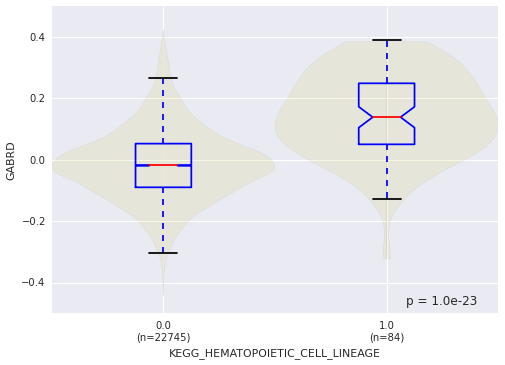

In [271]:
violin_plot_pandas(gene_sets['KEGG_HEMATOPOIETIC_CELL_LINEAGE'], 
                   corr_change.ix['GABRD'].dropna())

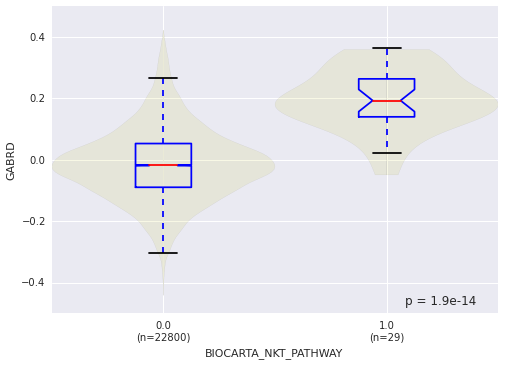

In [272]:
violin_plot_pandas(gene_sets['BIOCARTA_NKT_PATHWAY'], corr_change.ix['GABRD'].dropna())

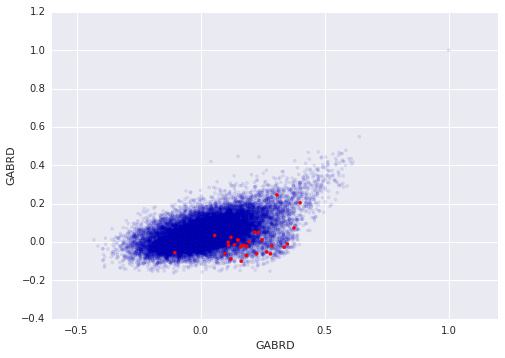

In [275]:
gs = 'BIOCARTA_NKT_PATHWAY'
fig, ax = subplots()
series_scatter(corr_profile_m['GABRD'], corr_profile_t['GABRD'], s=10, ax=ax, ann=None,
               alpha=.1)
series_scatter(corr_profile_m['GABRD'], corr_profile_t['GABRD'].ix[ti(gene_sets[gs]>0)], 
               s=10, ax=ax, color='red', alpha=1, ann=None)

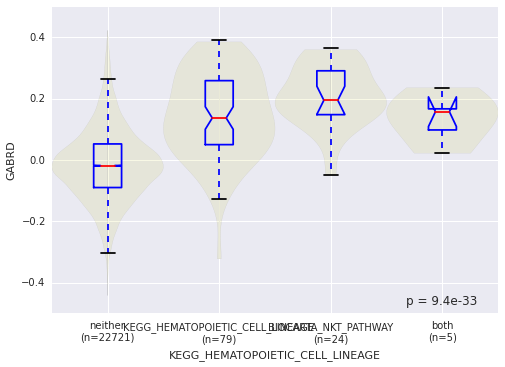

In [267]:
cc = combine(gene_sets['KEGG_HEMATOPOIETIC_CELL_LINEAGE'],
            gene_sets['BIOCARTA_NKT_PATHWAY'])
violin_plot_pandas(cc, corr_change.ix['GABRD'].dropna())